# Analyzing HR data to evaluate factors influencing employees to leave a company as well as predicting whether an employee will leave the company or not

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("data/HR_comma_sep.csv")

In [3]:
print(data.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Looking at the distribution of the target variable

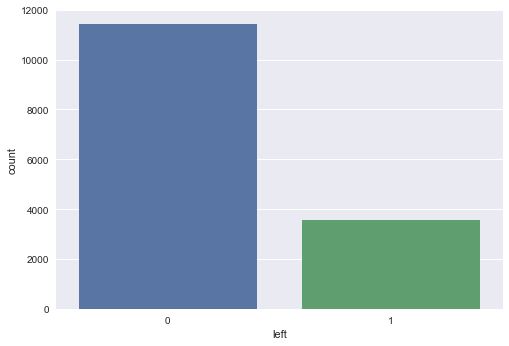

In [6]:
sns.countplot(x=data['left']) 

In [7]:
data.isnull().sum().sum()

0

Comparing the satisfaction levels of past and present employees 

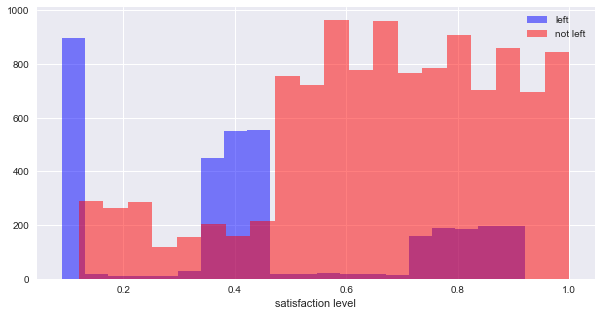

In [8]:
plt.figure(figsize=(10,5))
data[data['left']==1]['satisfaction_level'].hist(alpha=0.5,color='blue',bins=20,label='left')
data[data['left']==0]['satisfaction_level'].hist(alpha=0.5,color='red',bins=20,label='not left')
plt.xlabel('satisfaction level')
plt.legend()

Clearly, employees who are still working with the company have a high statisfaction level, confirming the obvious.

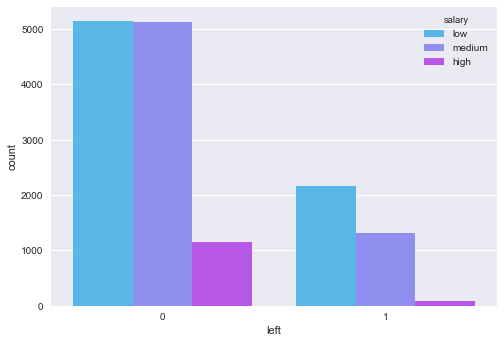

In [9]:
sns.countplot(x=data['left'],hue=data['salary'],palette='cool')

The above result is because of the imbalanced dataset but evaluating the two classes ('employee left','employee did not leave') individually, employees which left have a much higher ratio of low salaries as opposed to employees which are still present which have low as well as medium salaries.

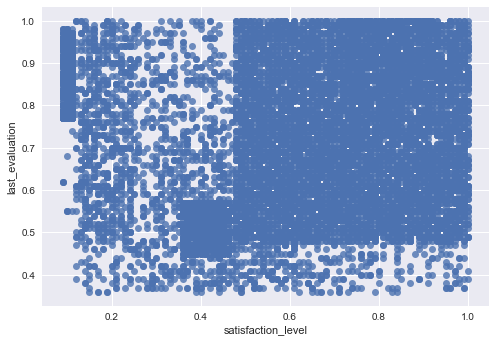

In [10]:
sns.regplot(x='satisfaction_level',y='last_evaluation',data=data,fit_reg=False)

This plot portrays: how does the satisfaction level of employees affects their work performance. Majorly, employees who are highly satisfied also have a good evaluation score. But there is a small patch which shows that employees have a high performance but not satisfied with their jobs. This could count for the group of people about to leave their jobs, probably, due to lack of challenging work or monotonous tasks.

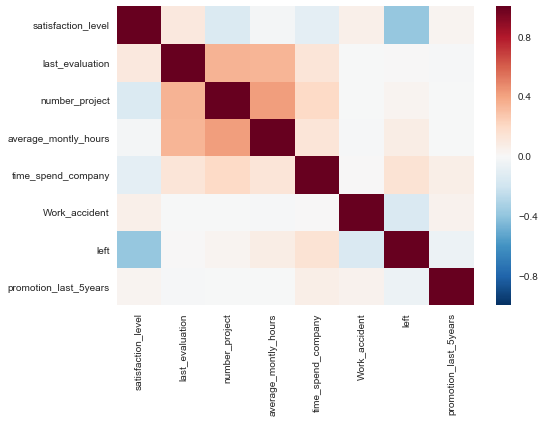

In [11]:
c=data.corr()
sns.heatmap(c)

The heatmap based on correlation of variables shows that satisfaction level has a negative correlation to the target variable 'left' which is not surprising since more lower the satisfaction level of an employee, higher is the tendency to leave, that is, left=1. 

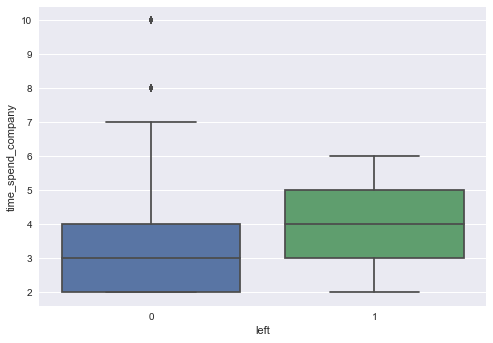

In [12]:
ax=sns.boxplot(x='left',y='time_spend_company',data=data)

The boxplot displays one of the reasons for leaving a company. After spending quite a few years at any company, employees look for a change in environment, work and culture. People who have left the company have spent more years than those who are still working.

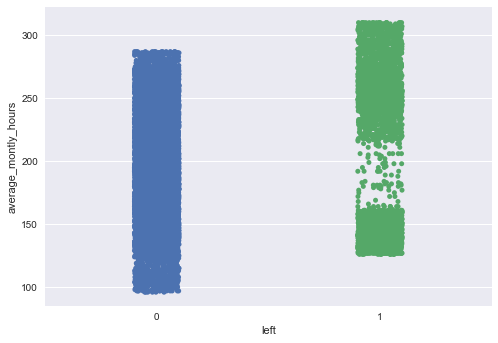

In [13]:
sns.stripplot(y='average_montly_hours',x='left',data=data,jitter=True)

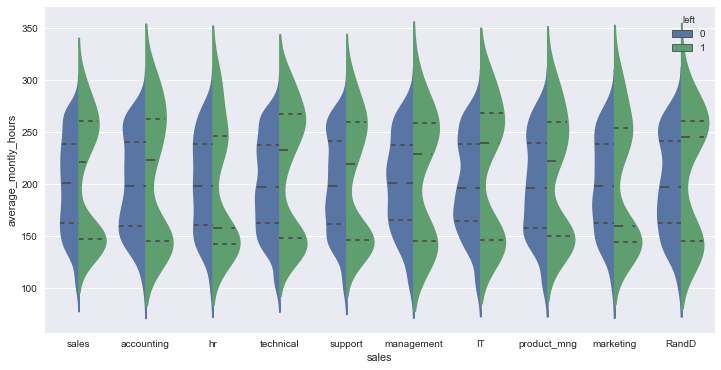

In [14]:
plt.figure(figsize=(12,6))
ax=sns.violinplot(x='sales',y='average_montly_hours',data=data,hue='left',split=True,inner='quartile')

The violinplot and stripplots prove that average monthly hours spent by people who left were much more than those who are still present but this can also be due to the class imbalance wherein current employees have a higher count and variability comparatively.

In [19]:
df=pd.get_dummies(data,columns=['sales','salary']) #one hot encoding of the categorical variables
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
trainx,testx,trainy,testy=train_test_split(df.drop('left',1),df['left'],test_size=0.3)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [28]:
lr.fit(trainx,trainy)
dt.fit(trainx,trainy)
rf.fit(trainx,trainy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [29]:
lr_pred=lr.predict(testx)
dt_pred=dt.predict(testx)
rf_pred=rf.predict(testx)

In [30]:
from sklearn.metrics import classification_report

In [34]:
from sklearn.metrics import roc_curve

In [38]:
lr_pred1=lr.predict_proba(testx)[:,1]
fpr_lr,tpr_lr,_=roc_curve(testy,lr_pred1)
dt_pred1=dt.predict_proba(testx)[:,1]
fpr_dt,tpr_dt,_=roc_curve(testy,dt_pred1)
rf_pred1=rf.predict_proba(testx)[:,1]
fpr_rf,tpr_rf,_=roc_curve(testy,rf_pred1)

In [39]:
print("Logistic Regression")
print(classification_report(testy,lr_pred))

Logistic Regression
             precision    recall  f1-score   support

          0       0.82      0.93      0.87      3428
          1       0.60      0.34      0.43      1072

avg / total       0.77      0.79      0.77      4500



In [40]:
print("Decision Tree Classifier")
print(classification_report(testy,dt_pred))

Decision Tree Classifier
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      3428
          1       0.94      0.96      0.95      1072

avg / total       0.98      0.98      0.98      4500



In [41]:
print("Random Forest Classifier")
print(classification_report(testy,rf_pred))

Random Forest Classifier
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      3428
          1       0.99      0.95      0.97      1072

avg / total       0.99      0.99      0.99      4500



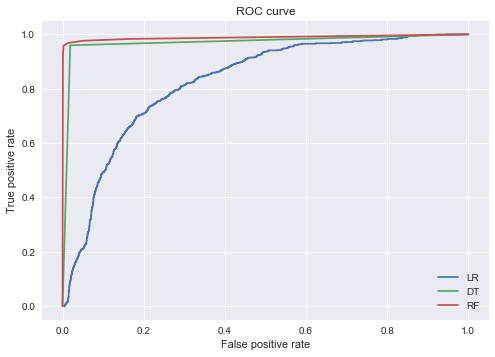

In [42]:
plt.figure(1)
plt.plot(fpr_lr,tpr_lr,label='LR')
plt.plot(fpr_dt,tpr_dt,label='DT')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

The evaluation report and ROC curves provide evidence on how well the Random Forest and Decision Tree models perform in comparison to the Logistic Regression model. 